In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [2]:
train_data = pd.read_csv('../dataset/train.csv')

In [6]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')

In [8]:
train_data = train_data[['id', 'date', 'target']]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   date    datetime64[ns]
 2   target  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 98.7 MB


In [52]:
split_date = pd.to_datetime('2019-12-21')
val = train_data[train_data['date'] >= split_date]
train = train_data[train_data['date'] < split_date]

In [53]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71856 entries, 4240502 to 4312357
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      71856 non-null  int64         
 1   date    71856 non-null  datetime64[ns]
 2   target  71856 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240502 entries, 0 to 4240501
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   date    datetime64[ns]
 2   target  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 129.4 MB


In [116]:
# Evaluate the moving average model(MA) with id = 51

train_id_51 = train[train['id'] == 51]
val_id_51 = val[val['id'] == 51]

In [117]:
train_id_51.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8498 entries, 51 to 4240054
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      8498 non-null   int64         
 1   date    8498 non-null   datetime64[ns]
 2   target  8498 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 265.6 KB


In [118]:
from sklearn.metrics import mean_absolute_error

"""
The (p,d,q) order of the model for the autoregressive, differences, and moving average components. 
d is always an integer, while p and q may either be integers or lists of integers.
"""

ma_model = ARIMA(train_id_51['target'].values, order=(0, 0, 30)).fit()

n_train = train_id_51.shape[0]
n_test = val_id_51.shape[0]

pred = ma_model.predict(start=n_train, end=n_train + n_test)

In [58]:
n_test

144

Text(0.5, 1.0, 'MA model prediction of id 51')

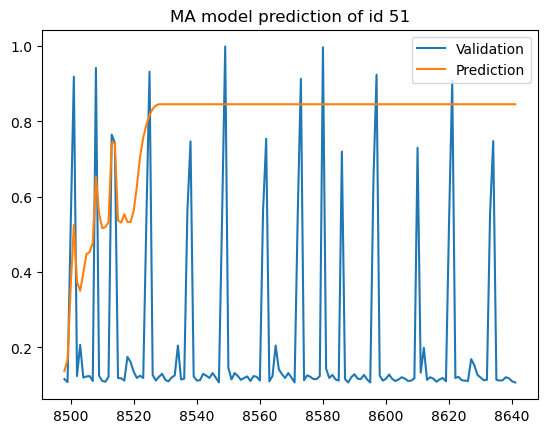

In [120]:
import matplotlib.pyplot as plt

plt.plot(range(n_train, n_train + n_test), val_id_51['target'].values)
plt.plot(range(n_train, n_train + n_test), pred[:-1])
plt.legend(['Validation', 'Prediction'])
plt.title('MA model prediction of id 51')

In [121]:
mean_absolute_error(val_id_51['target'], pred[:-1])

0.579363825455655

In [97]:
# Evaluate the auto-regressive model(AR) with id = 17

train_id_17 = train[train['id'] == 17]
val_id_17 = val[val['id'] == 17]

ar_model = ARIMA(train_id_17['target'].values, order=(35, 0, 0)).fit()
pred = ar_model.predict(start=n_train, end=n_train + n_test)

d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'AR model prediction of value 17')

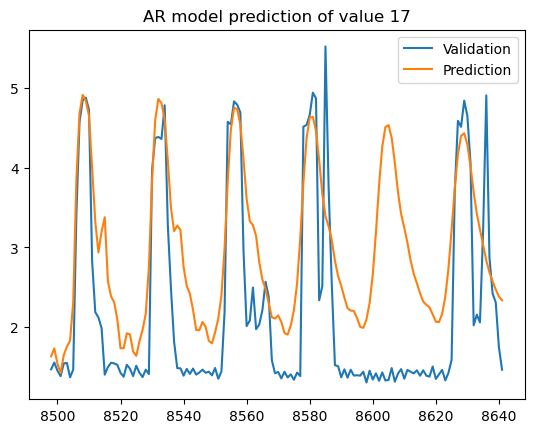

In [114]:
plt.plot(range(n_train, n_train + n_test), val_id_17['target'].values)
plt.plot(range(n_train, n_train + n_test), pred[:-1])
plt.legend(['Validation', 'Prediction'])
plt.title('AR model prediction of value 17')

In [99]:
mean_absolute_error(val_id_17['target'].values, pred[:-1])

0.849525007320104

In [111]:
# Evaluate the ARIMA model with id = 17



arima_model = ARIMA(train_id_17['target'].values, order=(20, 3, 15)).fit()
pred = ar_model.predict(start=n_train, end=n_train + n_test)



d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'ARIMA model prediction of value 17')

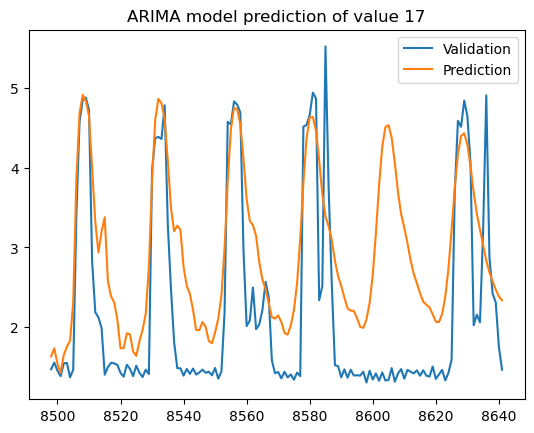

In [115]:
plt.plot(range(n_train, n_train + n_test), val_id_17['target'].values)
plt.plot(range(n_train, n_train + n_test), pred[:-1])
plt.legend(['Validation', 'Prediction'])
plt.title('ARIMA model prediction of value 17')

In [113]:
mean_absolute_error(val_id_17['target'].values, pred[:-1])

0.849525007320104